* 학습 코드를 실행하기 전에 <b>[런타임]</b> - <b>[런타임 유형 변경]</b>에서 하드웨어 가속기를 <b>[GPU]</b>로 설정한다.

### <b>데이터 세트 다운로드</b>

* 딥러닝 모델 학습 과정에서 필요한 데이터 세트를 불러온다.

In [1]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

Cloning into 'weather_dataset'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1117 (delta 0), reused 3 (delta 0), pack-reused 1111
Receiving objects: 100% (1117/1117), 85.23 MiB | 12.30 MiB/s, done.
Checking out files: 100% (1126/1126), done.
/content/weather_dataset


### <b>라이브러리 불러오기(Load Libraries)</b>

* 딥러닝 모델 학습 과정에서 필요한 라이브러리를 불러온다.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

### <b>데이터 세트 불러오기(Load Dataset)</b>

1. <b>데이터 증진(data augmentation)</b>을 명시하여 초기화할 수 있다.
  * 이미지를 불러올 때 어떤 방법(회전, 자르기, 뒤집기 등)을 사용할 것인지 명시한다.
2. 이후에 <b>flow()</b>를 이용하여 실질적으로 데이터를 불러올 수 있다.
  * 어떤 데이터를 사용할 것인지, 배치 크기(batch size), 데이터 셔플(shuffle) 여부 등을 명시한다.
  * <b>next() 함수</b>를 이용하여 numpy array 형태로 데이터를 배치 단위로 얻을 수 있다.
* <b>Reference</b>: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [3]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    validation_split=0.2
)
test_generator = ImageDataGenerator(rescale=1/255.)

train_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    subset="training"
)
val_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    subset="validation"
)
test_flow = test_generator.flow_from_directory(
    directory='test/',
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


### <b>데이터 시각화(Data Visualization)</b>

['Shine', 'Sunrise', 'Sunrise', 'Shine']


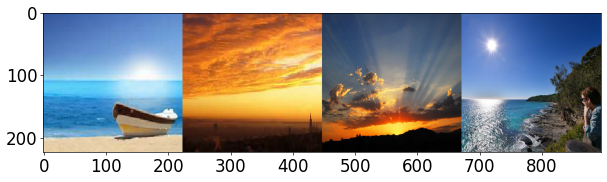

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

class_names = {
  0: "Cloudy",
  1: "Rain",
  2: "Shine",
  3: "Sunrise"
}

images, targets = next(train_flow)

print([class_names[x] for x in np.argmax(targets[:4], axis=1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.show()

### <b>딥러닝 모델 학습(Training)</b>

* 자신이 직접 정의한 뉴럴 네트워크를 이용하여 데이터 세트에 대한 학습이 가능하다.
  * 레이어의 깊이를 늘려 가며, 파라미터의 개수를 증가시킬 수 있다.

In [ ]:
def get_model_1():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(4, activation="softmax"))
    return model


def get_model_2():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(4, activation="softmax"))
    return model


def get_model_3():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation="softmax"))
    return model

### <b>학습 결과 확인하기</b>

* 학습 결과를 시각화하여 정상적으로 모델이 학습되었는지 확인한다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 602116    
Total params: 602,116
Trainable params: 602,116
Non-trainable params: 0
_________________________________________________________________


/home/dongbin/mine/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
11/11 [==============================] - 8s 660ms/step - loss: 69.6950 - accuracy: 0.3521 - val_loss: 65.9517 - val_accuracy: 0.4405
Epoch 2/20
11/11 [==============================] - 7s 599ms/step - loss: 50.9399 - accuracy: 0.4749 - val_loss: 52.4174 - val_accuracy: 0.4702
Epoch 3/20
11/11 [==============================] - 7s 617ms/step - loss: 45.3034 - accuracy: 0.5044 - val_loss: 40.3824 - val_accuracy: 0.5060
Epoch 4/20
11/11 [==============================] - 7s 650ms/step - loss: 32.9574 - accuracy: 0.5621 - val_loss: 46.8993 - val_accuracy: 0.6310
Epoch 5/20
11/11 [==============================] - 7s 668ms/step - loss: 19.6828 - accuracy: 0.6243 - val_loss: 38.0893 - val_accuracy: 0.6071
Epoch 6/20
11/11 [==============================] - 7s 670ms/step - loss: 27.5999 - accuracy: 0.5843 - val_loss: 28.2362 - val_accuracy: 0.5595
Epoch 7/20
11/11 [==============================] - 7s 666ms/step - loss: 13.4047 - accuracy: 0.6820 - val_loss: 42.1991 - val_accuracy:

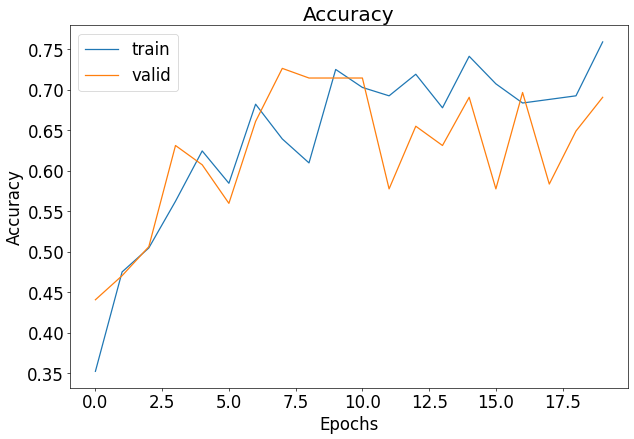

5/5 [==============================] - 1s 211ms/step - loss: 10.3099 - accuracy: 0.7473
Test loss: 10.30994511
Test accuracy: 74.73%


In [ ]:
model_1 = get_model_1()
model_1.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_1.compile(
    optimizer=optimizers.SGD(lr=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_1.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_1.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 9,634,116
Trainable params: 9,634,116
Non-trainable params: 0
_________________________________________________________________


/home/dongbin/mine/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
11/11 [==============================] - 8s 758ms/step - loss: 7.6001 - accuracy: 0.2929 - val_loss: 1.2046 - val_accuracy: 0.4048
Epoch 2/20
11/11 [==============================] - 7s 664ms/step - loss: 1.1227 - accuracy: 0.4822 - val_loss: 1.0947 - val_accuracy: 0.4643
Epoch 3/20
11/11 [==============================] - 8s 735ms/step - loss: 0.9803 - accuracy: 0.5044 - val_loss: 0.9767 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 7s 572ms/step - loss: 0.8966 - accuracy: 0.5769 - val_loss: 0.9905 - val_accuracy: 0.5238
Epoch 5/20
11/11 [==============================] - 8s 702ms/step - loss: 1.0121 - accuracy: 0.5251 - val_loss: 0.9253 - val_accuracy: 0.5833
Epoch 6/20
11/11 [==============================] - 7s 623ms/step - loss: 0.9705 - accuracy: 0.5740 - val_loss: 0.8818 - val_accuracy: 0.5893
Epoch 7/20
11/11 [==============================] - 7s 682ms/step - loss: 0.8137 - accuracy: 0.6213 - val_loss: 0.9661 - val_accuracy: 0.5893
Epoch 

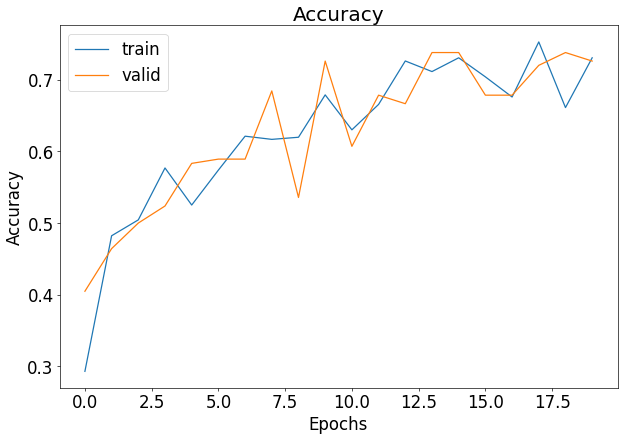

5/5 [==============================] - 1s 196ms/step - loss: 0.8024 - accuracy: 0.6904
Test loss: 0.80236495
Test accuracy: 69.04%


In [ ]:
model_2 = get_model_2()
model_2.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_2.compile(
    optimizer=optimizers.SGD(lr=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_2.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_2.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

### <b>생각해 볼 거리</b>

* 더 파라미터의 수가 많고, 깊은 네트워크를 사용했음에도 정확도가 오히려 떨어지는 이유는?

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               19267712  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

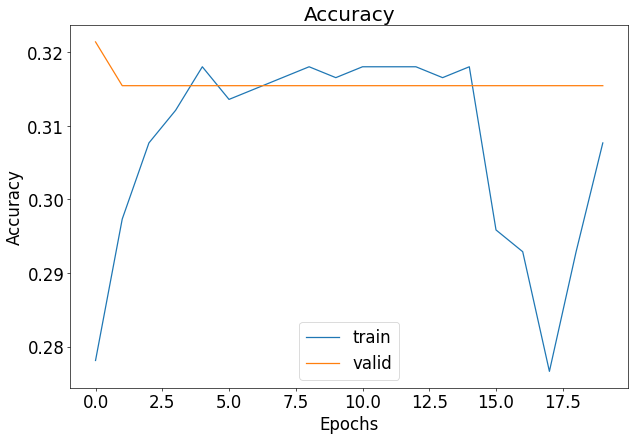

5/5 [==============================] - 1s 190ms/step - loss: 1.0970 - accuracy: 0.3167
Test loss: 1.09699690
Test accuracy: 31.67%


In [ ]:
model_3 = get_model_3()
model_3.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_3.compile(
    optimizer=optimizers.SGD(lr=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_3.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_3.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")